# Assignment 3: Job Salary Prediction

Student Name: `Hugo Akindele-Obe`

Student ID: `1444970`

## Research Question: Does Unlabelled data improve Job salary prediction?

### General Info:



In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.semi_supervised import LabelSpreading
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, adjusted_mutual_info_score, normalized_mutual_info_score, rand_score, adjusted_rand_score, homogeneity_completeness_v_measure
import matplotlib.pyplot as plt
import time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
raw_train_data = pd.read_csv("data/raw-data/train.csv")
raw_valid_data = pd.read_csv("data/raw-data/valid.csv")
raw_test_data = pd.read_csv("data/raw-data/test.csv")

emb_train_data = pd.DataFrame(np.load("data/embeddings-data/train-embeddings.npy"))
X_valid_emb = pd.DataFrame(np.load("data/embeddings-data/valid-embeddings.npy"))
X_test_emb = pd.DataFrame(np.load("data/embeddings-data/test-embeddings.npy"))

tfidf_train_data = pd.DataFrame(np.load("data/tfidf-data/train-tfidf.npy"))
X_valid_tfidf = pd.DataFrame(np.load("data/tfidf-data/valid-tfidf.npy"))
X_test_tfidf = pd.DataFrame(np.load("data/tfidf-data/test-tfidf.npy"))

# LABELS
y_train_lab = raw_train_data.iloc[:8000, 2] # only contains salary bin
y_valid = raw_valid_data.iloc[:,2] # only contains salary bin
# y_test = raw_test_data.iloc[:,2] # THESE ANSWERS AREN't IN THE FILE, HAVE TO SUBMIT TO KAGGLE

# RAW DATA
X_train_lab_raw = raw_train_data.iloc[:8000, 1] # only contains the job description
X_train_unlab_raw = raw_train_data.iloc[8000:, 1] # only contains the job description
X_valid_raw = raw_valid_data.iloc[:,1] # only contains the job description
X_test_raw = raw_test_data.iloc[:,1] # only contains the job description

# EMBEDDED DATA
X_train_lab_emb = emb_train_data.iloc[:8000, :]
X_train_unlab_emb = emb_train_data.iloc[8000:, :]

# TFIDF DATA
X_train_lab_tfidf = tfidf_train_data.iloc[:8000, :]
X_train_unlab_tfidf = tfidf_train_data.iloc[8000:, :]

# tfidf_train.head()
# raw_train.head()
# emb_train.head()
# X_valid_raw.shape
# y_valid_raw.head()

# raw_train_data.shape
# tfidf_train_data.head()
# emb_train_data.shape

# X_train_lab_raw.tail()
# X_train_unlab_raw.head()
# y_train_lab_raw.tail()



(8000,)
(8000, 384)
(8000, 500)


In [47]:
# starting with TF-IDF
dummy = DummyClassifier(strategy="most_frequent")
KNN = KNeighborsClassifier(n_neighbors=20)
GNB = GaussianNB()
MNB = MultinomialNB(alpha=0.7)
BNB = BernoulliNB(alpha=0.7)
# MLP = MLPClassifier()
LR = LogisticRegression(max_iter=250)

print("----TF-IDF----")
dummy.fit(X_train_lab_raw, y_train_lab)
print("Dummy:\t", dummy.score(X_valid_raw, y_valid).round(4))
KNN.fit(X_train_lab_tfidf, y_train_lab)
print("KNN:\t", KNN.score(X_valid_tfidf, y_valid).round(4))
GNB.fit(X_train_lab_tfidf, y_train_lab)
print("GNB:\t", GNB.score(X_valid_tfidf, y_valid).round(4))
MNB.fit(X_train_lab_tfidf, y_train_lab)
print("MNB:\t", MNB.score(X_valid_tfidf, y_valid).round(4))
print("MNB:\t", MNB.score(X_train_lab_tfidf, y_train_lab).round(4))
BNB.fit(X_train_lab_tfidf, y_train_lab)
print("BNB:\t", BNB.score(X_valid_tfidf, y_valid).round(4))
LR.fit(X_train_lab_tfidf, y_train_lab)
print("LR:\t", LR.score(X_valid_tfidf, y_valid).round(4))
# MLP.fit(X_train_lab_tfidf, y_train_lab)
# print("MLP:\t", MLP.score(X_valid_tfidf, y_valid))

----TF-IDF----
Dummy:	 0.0996
GNB:	 0.2199
MNB:	 0.2326
MNB:	 0.3064
BNB:	 0.2113


In [45]:
# next up: embeddings
print("----Embeddings----")
print("Dummy:\t", dummy.score(X_valid_raw, y_valid).round(4))
KNN.fit(X_train_lab_emb, y_train_lab)
print("KNN:\t", KNN.score(X_valid_emb, y_valid).round(4))
print("KNN:\t", KNN.score(X_train_lab_emb, y_train_lab).round(3))
# GNB.fit(X_train_lab_emb, y_train_lab)
# print("GNB:\t", GNB.score(X_valid_emb, y_valid).round(4))
# MNB.fit(X_train_lab_emb, y_train_lab) negatives in the embeddings
# print("MNB:\t", MNB.score(X_valid_emb, y_valid))
# BNB.fit(X_train_lab_emb, y_train_lab)
# print("BNB:\t", BNB.score(X_valid_emb, y_valid).round(4))
LR.fit(X_train_lab_emb, y_train_lab)
print("LR:\t", LR.score(X_valid_emb, y_valid).round(3))
print("LR:\t", LR.score(X_train_lab_emb, y_train_lab).round(3))

# MLP.fit(X_train_lab_emb, y_train_lab)
# print("MLP:\t", MLP.score(X_valid_emb, y_valid))

----Embeddings----
Dummy:	 0.0996
KNN:	 0.2378
KNN:	 0.337
LR:	 0.244
LR:	 0.329


In [17]:
# Obtain baseline performance for models given best parameters
LR = LogisticRegression(max_iter=250)
KNN = KNeighborsClassifier(n_neighbors=20, metric="cosine")
MNB = MultinomialNB(alpha=0.5)

# training
LR.fit(X_train_lab_emb, y_train_lab)
KNN.fit(X_train_lab_emb, y_train_lab)
MNB.fit(X_train_lab_tfidf, y_train_lab)

# test predictions
LR_pred = LR.predict(X_test_emb)
KNN_pred = KNN.predict(X_test_emb)
MNB_pred = MNB.predict(X_test_tfidf)

# save to disk
pred2submission(LR_pred).to_csv("report_results/baseline/LR_pred.csv", index=False)
pred2submission(KNN_pred).to_csv("report_results/baseline/KNN_pred.csv", index=False)
pred2submission(MNB_pred).to_csv("report_results/baseline/MNB_pred.csv", index=False)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

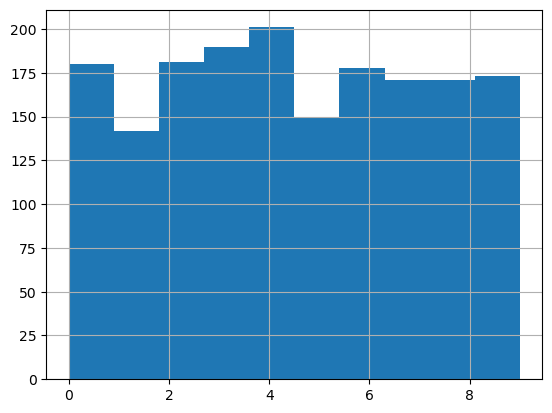

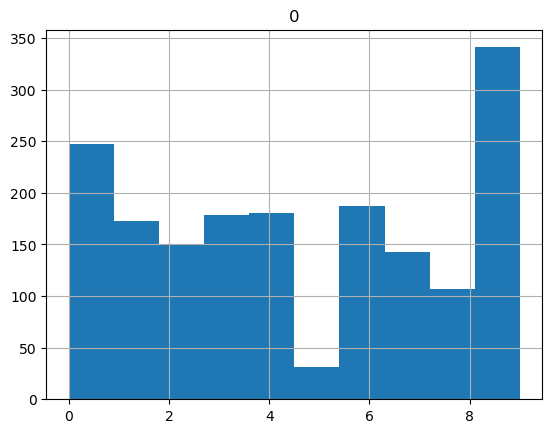

In [7]:
#histogram of predicted class distributions from LR model

LR_predicts = pd.DataFrame(LR.predict(X_valid_emb))
# print(LR_predicts)
y_valid.hist()
LR_predicts.hist()

In [17]:
# FIND BEST PARAM FOR LOGISTIC REGRESSION
warnings.simplefilter(action='ignore', category=UserWarning)
# Define the parameter grid to search over
param_grid = {'max_iter': [100, 250, 500, 1000, 5000]}
grid_search = GridSearchCV(LR, param_grid, cv=5)
grid_search.fit(X_train_lab_emb, y_train_lab)

# Print the best parameters and accuracy score
print("Best max_iter value:", grid_search.best_params_['max_iter'])
print("Accuracy:", grid_search.score(X_valid_emb, y_valid))

In [18]:
# FIND BEST PARAM FOR KNN

# Define the parameter grid to search over
# param_grid = {'n_neighbors': [5,10,20,30]}
# grid_search = GridSearchCV(KNN, param_grid, cv=5)
# grid_search.fit(X_train_lab_emb, y_train_lab)

# print("Best n_neighbors value:", grid_search.best_params_['n_neighbors'])
# print("Accuracy:", grid_search.score(X_valid_emb, y_valid))

In [19]:
# FIND BEST PARAM FOR BNB

param_grid = {'alpha':[0.7,0.8,0.9,1.0,2,3]}
grid_search = GridSearchCV(BNB, param_grid, cv=5)
grid_search.fit(X_train_lab_emb, y_train_lab)

print("Best alpha value:", grid_search.best_params_['alpha'])
print("Accuracy:", grid_search.score(X_valid_emb, y_valid))

Best alpha value: 0.7
Accuracy: 0.2141623488773748


In [20]:
# best faram for MNB
param_grid = {'alpha':[0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2,3]}
grid_search = GridSearchCV(MNB, param_grid, cv=5)
grid_search.fit(X_train_lab_tfidf, y_train_lab)

print("Best alpha value:", grid_search.best_params_['alpha'])
print("Accuracy:", grid_search.score(X_valid_tfidf, y_valid))

Best alpha value: 0.5
Accuracy: 0.231433506044905


In [8]:
def plotAccByThreshold(thresholds, accs, num_labelled, num_instances, rounds):
    ax1 = plt.subplot(211)
    ax1.plot(thresholds, accs, color="b")
    ax1.set_ylabel("Accuracy", color="b")
    ax1.tick_params("y", colors="b")

    ax2 = ax1.twinx()
    ax2.set_ylim(bottom=0, top=num_instances)
    ax2.set_ylabel("Amount of labeled samples", color="g")
    ax2.tick_params("y", colors="g")
    ax2.plot(thresholds, num_labelled, color="g")

    ax3 = plt.subplot(212, sharex=ax1)
    ax3.set_ylim(bottom=0, top=30)
    ax3.set_ylabel("Amount of iterations")
    ax3.set_xlabel("Threshold")
    ax3.plot(thresholds, rounds, color="b")
    plt.show()

In [11]:
# prepping labeled+unlabelled data
y_train_all = raw_train_data.iloc[:, 2]
y_train_all = np.nan_to_num(y_train_all, nan=-1)

THRESHOLDS -- LOGISTIC REGRESSION
Total instances:	 13902
Threshold: 0.30 | Acc: 0.2309 	Labelled: 3471 	Iterations: 30 	F1: 0.1767 	Prec: 0.2222 	Rec:0.2284
Threshold: 0.35 | Acc: 0.2389 	Labelled: 1925 	Iterations: 18 	F1: 0.1892 	Prec: 0.2074 	Rec:0.2344
Threshold: 0.40 | Acc: 0.2453 	Labelled: 1332 	Iterations: 12 	F1: 0.2022 	Prec: 0.2160 	Rec:0.2408
Threshold: 0.45 | Acc: 0.2441 	Labelled: 864 	Iterations: 14 	F1: 0.2071 	Prec: 0.2100 	Rec:0.2398
Threshold: 0.50 | Acc: 0.2447 	Labelled: 520 	Iterations: 10 	F1: 0.2126 	Prec: 0.2112 	Rec:0.2412
Threshold: 0.55 | Acc: 0.2441 	Labelled: 277 	Iterations: 7 	F1: 0.2160 	Prec: 0.2158 	Rec:0.2410
Threshold: 0.60 | Acc: 0.2435 	Labelled: 162 	Iterations: 6 	F1: 0.2183 	Prec: 0.2178 	Rec:0.2407
Threshold: 0.65 | Acc: 0.2441 	Labelled: 85 	Iterations: 7 	F1: 0.2206 	Prec: 0.2201 	Rec:0.2416
Threshold: 0.70 | Acc: 0.2441 	Labelled: 32 	Iterations: 3 	F1: 0.2210 	Prec: 0.2201 	Rec:0.2419
Threshold: 0.75 | Acc: 0.2447 	Labelled: 16 	Iteration

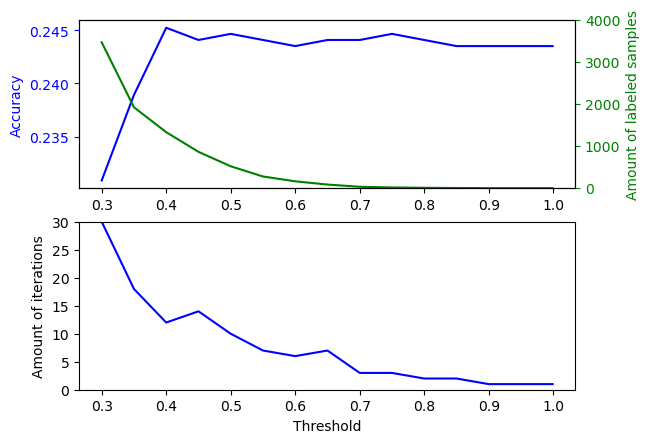

In [22]:

# emb_train_data

# print(emb_train_data.shape)
# print(y_train_all.shape)

# left axis = accuracy, bottom axis = threshold, right axis = number of labels added
thresholds = np.arange(0.3, 1.0, 0.05)
thresholds = np.append(thresholds, 0.999)
# print(thresholds)

# LOGISTIC REGRESSION
LR = LogisticRegression(max_iter=250)
self_LR_accs = []
self_LR_f1s = []
self_LR_precs = []
self_LR_recs = []
self_LR_labelled = []
self_LR_rounds = []

start = time.time()


for threshold in thresholds:
    self_LR = SelfTrainingClassifier(LR, threshold=threshold, max_iter=30)
    
    self_LR.fit(emb_train_data, y_train_all)
    
    Y_valid_emb_pred = self_LR.predict(X_valid_emb)
    
    self_LR_accs.append(accuracy_score(y_valid, Y_valid_emb_pred))
    self_LR_f1s.append(f1_score(y_valid, Y_valid_emb_pred, average='macro')) 
    self_LR_precs.append(precision_score(y_valid, Y_valid_emb_pred, average='macro')) 
    self_LR_recs.append(recall_score(y_valid, Y_valid_emb_pred, average='macro')) 
    labelled_or_not = self_LR.labeled_iter_
    self_LR_labelled.append(labelled_or_not[np.where(labelled_or_not > 0)].shape[0])
    self_LR_rounds.append(self_LR.n_iter_)

end = time.time()

print("THRESHOLDS -- LOGISTIC REGRESSION")
print("Total instances:\t", emb_train_data.shape[0])
for i in range(thresholds.size):
    print("Threshold: %.2f" % thresholds[i].round(2), "| ", end='')
    print("Acc: %.4f" % self_LR_accs[i].round(4), "\t", end='')
    print("Labelled:", self_LR_labelled[i], "\t", end='')
    print("Iterations:", self_LR_rounds[i], "\t", end='')
    print("F1: %.4f" % self_LR_f1s[i].round(4), "\t", end='')
    print("Prec: %.4f" % self_LR_precs[i].round(4), "\t", end='')
    print("Rec:%.4f" % self_LR_recs[i].round(4))
    
print("Time:\t", end-start)

plotAccByThreshold(thresholds, self_LR_accs, self_LR_labelled, 4000, self_LR_rounds)


In [27]:
# LR Self-Training test prediction
self_LR = SelfTrainingClassifier(LR, threshold=0.75, max_iter=30)
self_LR.fit(emb_train_data, y_train_all)
self_LR_pred = self_LR.predict(X_test_emb)
pred2submission(self_LR_pred).to_csv("report_results/self_training/self_LR_pred.csv", index=False)

THRESHOLDS -- KNN
Total instances: 13902
Threshold: 0.30 | Acc: 0.2170 	Labelled: 4343 	Iterations: 15 	F1: 0.1997 	Prec: 0.2286 	Rec:0.2200
Threshold: 0.35 | Acc: 0.2222 	Labelled: 2989 	Iterations: 17 	F1: 0.2032 	Prec: 0.2178 	Rec:0.2250
Threshold: 0.40 | Acc: 0.2222 	Labelled: 2989 	Iterations: 17 	F1: 0.2032 	Prec: 0.2178 	Rec:0.2250
Threshold: 0.45 | Acc: 0.2234 	Labelled: 1754 	Iterations: 18 	F1: 0.2096 	Prec: 0.2186 	Rec:0.2261
Threshold: 0.50 | Acc: 0.2291 	Labelled: 651 	Iterations: 9 	F1: 0.2186 	Prec: 0.2201 	Rec:0.2307
Threshold: 0.55 | Acc: 0.2303 	Labelled: 314 	Iterations: 9 	F1: 0.2202 	Prec: 0.2188 	Rec:0.2320
Threshold: 0.60 | Acc: 0.2366 	Labelled: 187 	Iterations: 15 	F1: 0.2262 	Prec: 0.2239 	Rec:0.2380
Threshold: 0.65 | Acc: 0.2360 	Labelled: 97 	Iterations: 7 	F1: 0.2263 	Prec: 0.2242 	Rec:0.2375
Threshold: 0.70 | Acc: 0.2383 	Labelled: 47 	Iterations: 5 	F1: 0.2285 	Prec: 0.2264 	Rec:0.2398
Threshold: 0.75 | Acc: 0.2383 	Labelled: 47 	Iterations: 5 	F1: 0.2285

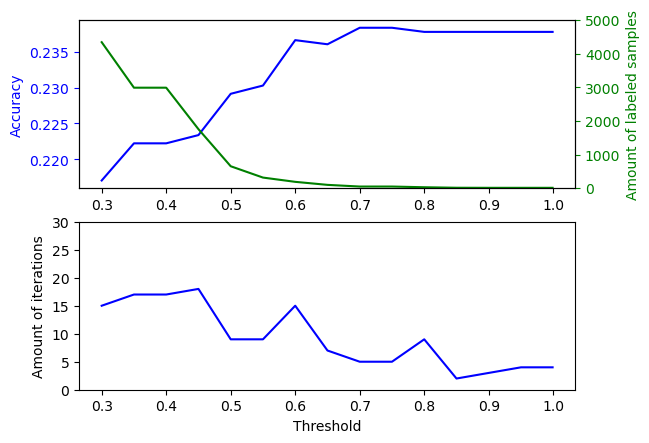

In [18]:
KNN = KNeighborsClassifier(n_neighbors=20, metric="cosine")

self_KNN_accs = []
self_KNN_f1s = []
self_KNN_precs = []
self_KNN_recs = []
self_KNN_labelled = []
self_KNN_rounds = []

start = time.time()

for threshold in thresholds:
    self_KNN = SelfTrainingClassifier(KNN, threshold=threshold, max_iter=30)
    
    self_KNN.fit(emb_train_data, y_train_all)
    
    Y_valid_emb_pred = self_KNN.predict(X_valid_emb)
    
    self_KNN_accs.append(accuracy_score(y_valid, Y_valid_emb_pred))
    self_KNN_f1s.append(f1_score(y_valid, Y_valid_emb_pred, average='macro')) 
    self_KNN_precs.append(precision_score(y_valid, Y_valid_emb_pred, average='macro')) 
    self_KNN_recs.append(recall_score(y_valid, Y_valid_emb_pred, average='macro')) 
    labelled_or_not = self_KNN.labeled_iter_
    self_KNN_labelled.append(labelled_or_not[np.where(labelled_or_not > 0)].shape[0])
    self_KNN_rounds.append(self_KNN.n_iter_)

end = time.time()

print("THRESHOLDS -- KNN")
print("Total instances:", emb_train_data.shape[0])
for i in range(thresholds.size):
    print("Threshold: %.2f" % thresholds[i].round(2), "| ", end='')
    print("Acc: %.4f" % self_KNN_accs[i].round(4), "\t", end='')
    print("Labelled:", self_KNN_labelled[i], "\t", end='')
    print("Iterations:", self_KNN_rounds[i], "\t", end='')
    print("F1: %.4f" % self_KNN_f1s[i].round(4), "\t", end='')
    print("Prec: %.4f" % self_KNN_precs[i].round(4), "\t", end='')
    print("Rec:%.4f" % self_KNN_recs[i].round(4))
    
print("Time:\t", end-start)

plotAccByThreshold(thresholds, self_KNN_accs, self_KNN_labelled, 5000, self_KNN_rounds)


In [26]:
# KNN Self-Training test prediction
self_KNN = SelfTrainingClassifier(KNN, threshold=0.75, max_iter=30)
self_KNN.fit(emb_train_data, y_train_all)
self_KNN_pred = self_KNN.predict(X_test_emb)
pred2submission(self_KNN_pred).to_csv("report_results/self_training/self_KNN_pred.csv", index=False)

THRESHOLDS -- KNN
Total instances: 13902
Threshold: 0.30 | Acc: 0.2170 	Labelled: 4343 	Iterations: 15 	F1: 0.1997 	Prec: 0.2286 	Rec:0.2200
Threshold: 0.35 | Acc: 0.2222 	Labelled: 2989 	Iterations: 17 	F1: 0.2032 	Prec: 0.2178 	Rec:0.2250
Threshold: 0.40 | Acc: 0.2222 	Labelled: 2989 	Iterations: 17 	F1: 0.2032 	Prec: 0.2178 	Rec:0.2250
Threshold: 0.45 | Acc: 0.2234 	Labelled: 1754 	Iterations: 18 	F1: 0.2096 	Prec: 0.2186 	Rec:0.2261
Threshold: 0.50 | Acc: 0.2291 	Labelled: 651 	Iterations: 9 	F1: 0.2186 	Prec: 0.2201 	Rec:0.2307
Threshold: 0.55 | Acc: 0.2303 	Labelled: 314 	Iterations: 9 	F1: 0.2202 	Prec: 0.2188 	Rec:0.2320
Threshold: 0.60 | Acc: 0.2366 	Labelled: 187 	Iterations: 15 	F1: 0.2262 	Prec: 0.2239 	Rec:0.2380
Threshold: 0.65 | Acc: 0.2360 	Labelled: 97 	Iterations: 7 	F1: 0.2263 	Prec: 0.2242 	Rec:0.2375
Threshold: 0.70 | Acc: 0.2383 	Labelled: 47 	Iterations: 5 	F1: 0.2285 	Prec: 0.2264 	Rec:0.2398
Threshold: 0.75 | Acc: 0.2383 	Labelled: 47 	Iterations: 5 	F1: 0.2285

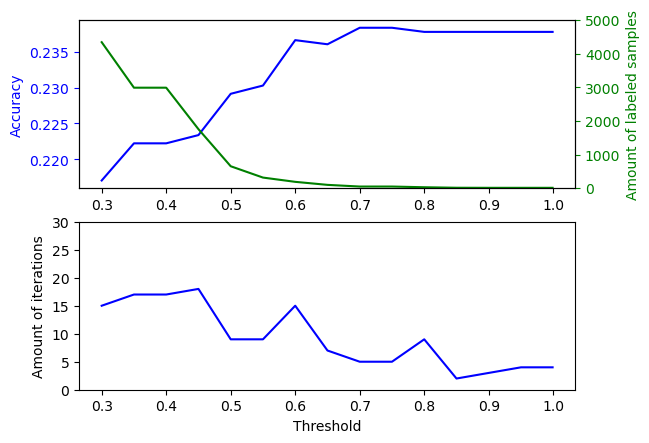

In [13]:
KNN = KNeighborsClassifier(n_neighbors=20, metric='cosine')

self_KNN_accs = []
self_KNN_f1s = []
self_KNN_precs = []
self_KNN_recs = []
self_KNN_labelled = []
self_KNN_rounds = []

start = time.time()

for threshold in thresholds:
    self_KNN = SelfTrainingClassifier(KNN, threshold=threshold, max_iter=30)
    
    self_KNN.fit(emb_train_data, y_train_all)
    
    Y_valid_emb_pred = self_KNN.predict(X_valid_emb)
    
    self_KNN_accs.append(accuracy_score(y_valid, Y_valid_emb_pred))
    self_KNN_f1s.append(f1_score(y_valid, Y_valid_emb_pred, average='macro')) 
    self_KNN_precs.append(precision_score(y_valid, Y_valid_emb_pred, average='macro')) 
    self_KNN_recs.append(recall_score(y_valid, Y_valid_emb_pred, average='macro')) 
    labelled_or_not = self_KNN.labeled_iter_
    self_KNN_labelled.append(labelled_or_not[np.where(labelled_or_not > 0)].shape[0])
    self_KNN_rounds.append(self_KNN.n_iter_)

end = time.time()

print("THRESHOLDS -- KNN")
print("Total instances:", emb_train_data.shape[0])
for i in range(thresholds.size):
    print("Threshold: %.2f" % thresholds[i].round(2), "| ", end='')
    print("Acc: %.4f" % self_KNN_accs[i].round(4), "\t", end='')
    print("Labelled:", self_KNN_labelled[i], "\t", end='')
    print("Iterations:", self_KNN_rounds[i], "\t", end='')
    print("F1: %.4f" % self_KNN_f1s[i].round(4), "\t", end='')
    print("Prec: %.4f" % self_KNN_precs[i].round(4), "\t", end='')
    print("Rec:%.4f" % self_KNN_recs[i].round(4))
    
print("Time:\t", end-start)

plotAccByThreshold(thresholds, self_KNN_accs, self_KNN_labelled, 5000, self_KNN_rounds)

In [150]:
# self_BNB_accs = []
# self_BNB_f1s = []
# self_BNB_labelled = []
# self_BNB_rounds = []

# start = time.time()


# for threshold in thresholds:
#     self_BNB = SelfTrainingClassifier(BNB, threshold=threshold, max_iter=30)
    
#     self_BNB.fit(tfidf_train_data, y_train_all)
    
#     Y_valid_tfidf_pred = self_BNB.predict(X_valid_tfidf)
    
#     self_BNB_accs.append(accuracy_score(y_valid, Y_valid_tfidf_pred))
#     self_BNB_f1s.append(f1_score(y_valid, Y_valid_tfidf_pred, average='macro')) 
#     labelled_or_not = self_BNB.labeled_iter_
#     self_BNB_labelled.append(labelled_or_not[np.where(labelled_or_not > 0)].shape[0])
#     self_BNB_rounds.append(self_BNB.n_iter_)

# end = time.time()

# print("THRESHOLDS -- BNB")
# print("Total instances:\t", tfidf_train_data.shape[0])
# for i in range(thresholds.size):
#     print("Threshold: ", thresholds[i].round(2), "\t", end='')
#     print("Accuracy: ", self_BNB_accs[i].round(4), "\t", end='')
#     print("F1: ", self_BNB_f1s[i].round(4), "\t", end='')
#     print("Num. Labelled: ", self_BNB_labelled[i], "\t", end='')
#     print("Iterations: ", self_BNB_rounds[i])
    
# print("Time:\t", end-start)

# ax1 = plt.subplot(211)
# ax1.plot(thresholds, self_BNB_accs, color="b")
# ax1.set_ylabel("Accuracy", color="b")
# ax1.tick_params("y", colors="b")

# ax2 = ax1.twinx()
# ax2.set_ylim(bottom=0, top=7000)
# ax2.set_ylabel("Amount of labeled samples", color="g")
# ax2.tick_params("y", colors="g")
# ax2.plot(thresholds, self_BNB_labelled, color="g")

# ax3 = plt.subplot(212, sharex=ax1)
# ax3.set_ylim(bottom=0, top=30)
# ax3.set_ylabel("Amount of iterations")
# ax3.set_xlabel("Threshold")
# ax3.plot(thresholds, self_BNB_rounds, color="b")

THRESHOLDS -- MNB
Total instances: 13902
Threshold: 0.30 | Acc: 0.2101 	Labelled: 4356 	Iterations: 15 	F1: 0.1319 	Prec: 0.2108 	Rec:0.2085
Threshold: 0.35 | Acc: 0.2101 	Labelled: 2369 	Iterations: 18 	F1: 0.1403 	Prec: 0.1930 	Rec:0.2056
Threshold: 0.40 | Acc: 0.2170 	Labelled: 1628 	Iterations: 12 	F1: 0.1552 	Prec: 0.1775 	Rec:0.2115
Threshold: 0.45 | Acc: 0.2193 	Labelled: 1148 	Iterations: 17 	F1: 0.1637 	Prec: 0.1773 	Rec:0.2139
Threshold: 0.50 | Acc: 0.2303 	Labelled: 680 	Iterations: 15 	F1: 0.1813 	Prec: 0.1845 	Rec:0.2248
Threshold: 0.55 | Acc: 0.2349 	Labelled: 282 	Iterations: 21 	F1: 0.1936 	Prec: 0.1915 	Rec:0.2301
Threshold: 0.60 | Acc: 0.2326 	Labelled: 45 	Iterations: 5 	F1: 0.2001 	Prec: 0.2064 	Rec:0.2295
Threshold: 0.65 | Acc: 0.2314 	Labelled: 28 	Iterations: 6 	F1: 0.1995 	Prec: 0.2057 	Rec:0.2284
Threshold: 0.70 | Acc: 0.2320 	Labelled: 5 	Iterations: 2 	F1: 0.2013 	Prec: 0.2076 	Rec:0.2288
Threshold: 0.75 | Acc: 0.2314 	Labelled: 3 	Iterations: 2 	F1: 0.2005 	

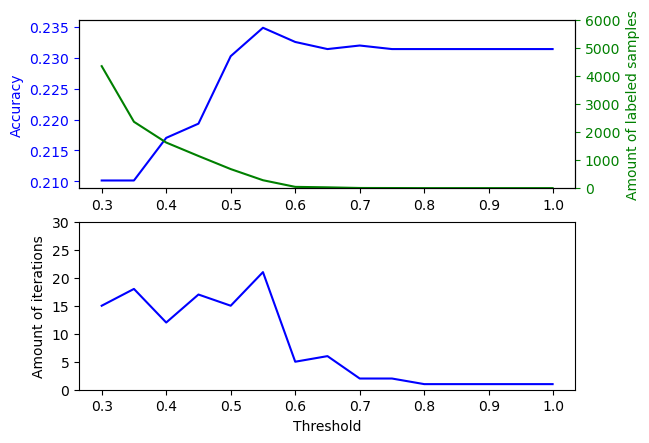

In [28]:
MNB = MultinomialNB(alpha=0.5)
self_MNB_accs = []
self_MNB_f1s = []
self_MNB_precs = []
self_MNB_recs = []
self_MNB_labelled = []
self_MNB_rounds = []

start = time.time()


for threshold in thresholds:
    self_MNB = SelfTrainingClassifier(MNB, threshold=threshold, max_iter=30)
    
    self_MNB.fit(tfidf_train_data, y_train_all)
    
    Y_valid_tfidf_pred = self_MNB.predict(X_valid_tfidf)
    
    self_MNB_accs.append(accuracy_score(y_valid, Y_valid_tfidf_pred))
    self_MNB_f1s.append(f1_score(y_valid, Y_valid_tfidf_pred, average='macro')) 
    self_MNB_precs.append(precision_score(y_valid, Y_valid_tfidf_pred, average='macro', zero_division=0)) 
    self_MNB_recs.append(recall_score(y_valid, Y_valid_tfidf_pred, average='macro')) 
    labelled_or_not = self_MNB.labeled_iter_
    self_MNB_labelled.append(labelled_or_not[np.where(labelled_or_not > 0)].shape[0])
    self_MNB_rounds.append(self_MNB.n_iter_)

end = time.time()

print("THRESHOLDS -- MNB")
print("Total instances:", tfidf_train_data.shape[0])
for i in range(thresholds.size):
    print("Threshold: %.2f" % thresholds[i].round(2), "| ", end='')
    print("Acc: %.4f" % self_MNB_accs[i].round(4), "\t", end='')
    print("Labelled:", self_MNB_labelled[i], "\t", end='')
    print("Iterations:", self_MNB_rounds[i], "\t", end='')
    print("F1: %.4f" % self_MNB_f1s[i].round(4), "\t", end='')
    print("Prec: %.4f" % self_MNB_precs[i].round(4), "\t", end='')
    print("Rec:%.4f" % self_MNB_recs[i].round(4))
    
print("Time:\t", end-start)

plotAccByThreshold(thresholds, self_MNB_accs, self_MNB_labelled, 6000, self_MNB_rounds)


In [32]:
# MNB Self-Training test prediction
self_MNB = SelfTrainingClassifier(MNB, threshold=0.70, max_iter=30)
self_MNB.fit(tfidf_train_data, y_train_all)
self_MNB_pred = self_MNB.predict(X_test_tfidf)
pred2submission(self_MNB_pred).to_csv("report_results/self_training/self_MNB_pred.csv", index=False)

In [154]:
# self_GNB_accs = []
# self_GNB_f1s = []
# self_GNB_labelled = []
# self_GNB_rounds = []

# start = time.time()


# for threshold in thresholds:
#     self_GNB = SelfTrainingClassifier(GNB, threshold=threshold, max_iter=30)
    
#     self_GNB.fit(tfidf_train_data, y_train_all)
    
#     Y_valid_tfidf_pred = self_GNB.predict(X_valid_tfidf)
    
#     self_GNB_accs.append(accuracy_score(y_valid, Y_valid_tfidf_pred))
#     self_GNB_f1s.append(f1_score(y_valid, Y_valid_tfidf_pred, average='macro')) 
#     labelled_or_not = self_GNB.labeled_iter_
#     self_GNB_labelled.append(labelled_or_not[np.where(labelled_or_not > 0)].shape[0])
#     self_GNB_rounds.append(self_GNB.n_iter_)

# end = time.time()

# print("THRESHOLDS -- GNB")
# print("Total instances:\t", tfidf_train_data.shape[0])
# for i in range(thresholds.size):
#     print("Threshold: ", thresholds[i].round(2), "\t", end='')
#     print("Accuracy: ", self_GNB_accs[i].round(4), "\t", end='')
#     print("F1: ", self_GNB_f1s[i].round(4), "\t", end='')
#     print("Num. Labelled: ", self_GNB_labelled[i], "\t", end='')
#     print("Iterations: ", self_GNB_rounds[i])
    
# print("Time:\t", end-start)

# ax1 = plt.subplot(211)
# ax1.plot(thresholds, self_GNB_accs, color="b")
# ax1.set_ylabel("Accuracy", color="b")
# ax1.tick_params("y", colors="b")

# ax2 = ax1.twinx()
# ax2.set_ylim(bottom=0, top=7000)
# ax2.set_ylabel("Amount of labeled samples", color="g")
# ax2.tick_params("y", colors="g")
# ax2.plot(thresholds, self_GNB_labelled, color="g")

# ax3 = plt.subplot(212, sharex=ax1)
# ax3.set_ylim(bottom=0, top=30)
# ax3.set_ylabel("Amount of iterations")
# ax3.set_xlabel("Threshold")
# ax3.plot(thresholds, self_GNB_rounds, color="b")

In [27]:
# # LOGISTIC REGRESSION -- TFIDF

# self_LR_accs = []
# self_LR_labelled = []
# self_LR_rounds = []

# start = time.time()

# for threshold in thresholds:
#     self_LR = SelfTrainingClassifier(LR, threshold=threshold, max_iter=20)
    
#     self_LR.fit(tfidf_train_data, y_train_all)
    
#     self_LR_accs.append(self_LR.score(X_valid_tfidf, y_valid))
#     labelled_or_not = self_LR.labeled_iter_
#     self_LR_labelled.append(labelled_or_not[np.where(labelled_or_not > 0)].shape[0])
#     self_LR_rounds.append(self_LR.n_iter_)

# end = time.time()

# print("THRESHOLDS -- LOGISTIC REGRESSION -- TFIDF")
# print("Total instances:\t", emb_train_data.shape[0])
# for i in range(thresholds.size):
#     print("Threshold: ", thresholds[i].round(2), "\t", end='')
#     print("Accuracy:\t", np.mean(self_LR_accs[i]).round(3), "\t", end='')
#     print("Num. Labelled:\t", self_LR_labelled[i], "\t", end='')
#     print("Iterations:\t", self_LR_rounds[i])
    
# print("Time:\t", end-start)

In [28]:
# self_KNN_accs = []
# self_KNN_labelled = []
# self_KNN_rounds = []

# start = time.time()


# for threshold in thresholds:
#     self_KNN = SelfTrainingClassifier(KNN, threshold=threshold, max_iter=20)
    
#     self_KNN.fit(tfidf_train_data, y_train_all)
    
#     self_KNN_accs.append(self_KNN.score(X_valid_tfidf, y_valid))
#     labelled_or_not = self_KNN.labeled_iter_
#     self_KNN_labelled.append(labelled_or_not[np.where(labelled_or_not > 0)].shape[0])
#     self_KNN_rounds.append(self_KNN.n_iter_)

# end = time.time()

# # print(thresholds)
# print("THRESHOLDS -- KNN -- TFIDF")
# print("Total instances:\t", emb_train_data.shape[0])
# for i in range(thresholds.size):
#     print("Threshold: ", thresholds[i].round(2), "\t", end='')
#     print("Accuracy:\t", np.mean(self_KNN_accs[i]).round(3), "\t", end='')
#     print("Num. Labelled:\t", self_KNN_labelled[i], "\t", end='')
#     print("Iterations:\t", self_KNN_rounds[i])
    
# print("Time:\t", end-start)

In [159]:
KNN_label_spread = LabelSpreading(kernel="knn", alpha=0.2)

start = time.time()

KNN_label_spread.fit(emb_train_data, y_train_all)
result = KNN_label_spread.score(X_valid_emb, y_valid)

end = time.time()

print("Time: ", end-start)
print("KNN Label Spread: ", result.round(4))

Time:  5.204706907272339
KNN Label Spread:  0.2309


In [30]:
RBF_label_spread = LabelSpreading(gamma=10)

start = time.time()

RBF_label_spread.fit(emb_train_data, y_train_all)
result = RBF_label_spread.score(X_valid_emb, y_valid)

end = time.time()
print("Time: ", end-start)

print("RBF Label Spread: ", result.round(4))

Time:  10.844311475753784
RBF Label Spread:  0.2516


In [20]:
def pred2submission(pred):
    submission = raw_test_data.iloc[:,:1]
    submission["salary_bin"] = pred
    submission["salary_bin"] = submission["salary_bin"].astype('int')
    return submission


In [173]:
# HAVE TO SUBMIT TO KAGGLE TO TEST
# self_KNN = SelfTrainingClassifier(KNN, threshold=0.75, max_iter=30)
# self_KNN.fit(emb_train_data, y_train_all)

# self_LR = SelfTrainingClassifier(LR, threshold=0.7, max_iter=30)    
# self_LR.fit(emb_train_data, y_train_all)

# # print(BNB.score(X_test_emb, y_test))

# result = self_KNN.score(X_test_emb, y_test)
# print("self_KNN on test: ", result.round(4))

# result = self_LR.score(X_test_emb, y_test)
# print("self_LR on test: ", result.round(4))

# self_LR_pred = self_LR.predict(X_test_emb)
# print(pred2submission(self_LR_pred))
# self_LR_result = test_job_ids.copy()
# self_LR_result["salary_bin"] = self_LR_pred
# self_LR_result.to_csv("results/self_LR_result.csv", index=False)
# np.savetxt('results/self_LR_result.csv', self_LR_result, delimiter=',')
# self_LR_result.to_csv("self_LR_result.csv")

self_KNN on test:  0.1755
self_LR on test:  0.1249


In [33]:
# print(LR.predict_proba(emb_train_data))
# print(BNB.predict_proba(emb_train_data))
thresholds = np.arange(0.95, 0.05, -0.05)
thresholds = np.insert(thresholds, 0, 0.999)
print(thresholds)


[0.999 0.95  0.9   0.85  0.8   0.75  0.7   0.65  0.6   0.55  0.5   0.45
 0.4   0.35  0.3   0.25  0.2   0.15  0.1  ]


In [47]:
# EXPERIMENTS FOR WHAT IF THERE WAS LESS LABELLED DATA AND MORE UNLABELLED DATA

# preparing new data split, only first 2000 labelled
y_train_2000 = y_train_all.copy()
y_train_2000[2000:] = -1

print(y_train_2000)


[ 9.  9.  4. ... -1. -1. -1.]


THRESHOLDS -- LOGISTIC REGRESSION -- LIMITED TO 2000 LABELLED INPUTS
Total instances:	 13902
Threshold:  0.5 	Accuracy:  0.1825 	F1:  0.0668 	Num. Labelled:  11187 	Iterations:  28
Threshold:  0.52 	Accuracy:  0.1808 	F1:  0.0663 	Num. Labelled:  10940 	Iterations:  30
Threshold:  0.55 	Accuracy:  0.1785 	F1:  0.0627 	Num. Labelled:  10576 	Iterations:  30
Threshold:  0.58 	Accuracy:  0.1785 	F1:  0.0632 	Num. Labelled:  9464 	Iterations:  30
Threshold:  0.6 	Accuracy:  0.1877 	F1:  0.0779 	Num. Labelled:  7359 	Iterations:  30
Threshold:  0.63 	Accuracy:  0.1992 	F1:  0.1058 	Num. Labelled:  5686 	Iterations:  30
Threshold:  0.65 	Accuracy:  0.2119 	F1:  0.1343 	Num. Labelled:  3975 	Iterations:  30
Threshold:  0.68 	Accuracy:  0.2263 	F1:  0.1836 	Num. Labelled:  491 	Iterations:  30
Threshold:  0.7 	Accuracy:  0.2205 	F1:  0.1943 	Num. Labelled:  9 	Iterations:  3
Threshold:  0.73 	Accuracy:  0.2211 	F1:  0.1946 	Num. Labelled:  2 	Iterations:  2
Threshold:  0.75 	Accuracy:  0.2211 

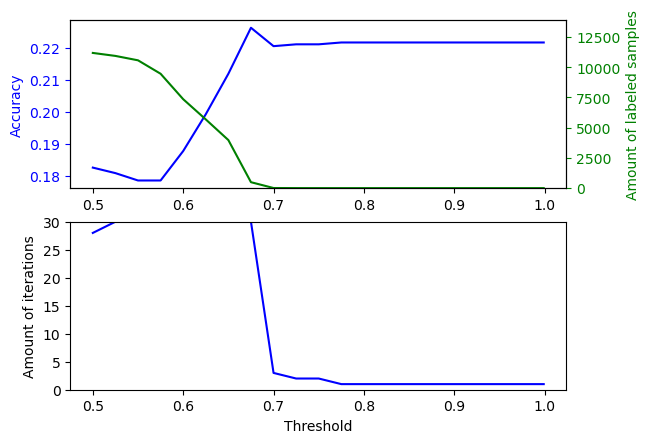

In [48]:
thresholds = np.arange(0.5, 1.0, 0.025)
thresholds = np.append(thresholds, 0.999)
# print(thresholds)

# LOGISTIC REGRESSION

self_LR2_accs = []
self_LR2_f1s = []
self_LR2_labelled = []
self_LR2_rounds = []

start = time.time()

for threshold in thresholds:
    self_LR2 = SelfTrainingClassifier(LR, threshold=threshold, max_iter=30)
    
    self_LR2.fit(emb_train_data, y_train_2000)
    
    Y_valid_emb_pred = self_LR2.predict(X_valid_emb)
    
    self_LR2_accs.append(accuracy_score(y_valid, Y_valid_emb_pred))
    self_LR2_f1s.append(f1_score(y_valid, Y_valid_emb_pred, average='macro')) 
    labelled_or_not = self_LR2.labeled_iter_
    self_LR2_labelled.append(labelled_or_not[np.where(labelled_or_not > 0)].shape[0])
    self_LR2_rounds.append(self_LR2.n_iter_)

end = time.time()

print("THRESHOLDS -- LOGISTIC REGRESSION -- LIMITED TO 2000 LABELLED INPUTS")
print("Total instances:\t", emb_train_data.shape[0])
for i in range(thresholds.size):
    print("Threshold: ", thresholds[i].round(2), "\t", end='')
    print("Accuracy: ", self_LR2_accs[i].round(4), "\t", end='')
    print("F1: ", self_LR2_f1s[i].round(4), "\t", end='')
    print("Num. Labelled: ", self_LR2_labelled[i], "\t", end='')
    print("Iterations: ", self_LR2_rounds[i])
    
print("Time:\t", end-start)

plotAccByThreshold(thresholds, self_LR2_accs, self_LR2_labelled, 13902, self_LR2_rounds)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

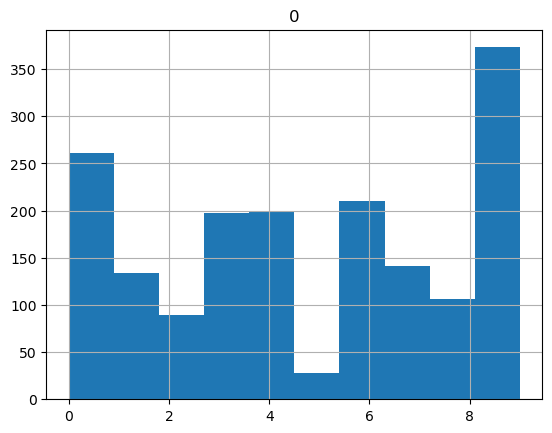

In [59]:
self_LR2_predicts = pd.DataFrame(self_LR2.predict(X_valid_emb))
self_LR2_predicts.hist()

THRESHOLDS -- KNN -- LIMITED TO 2000 LABELLED INPUTS
Total instances:	 13902
Threshold:  0.5 	Accuracy:  0.1117 	F1:  0.0422 	Num. Labelled:  11824 	Iterations:  11
Threshold:  0.52 	Accuracy:  0.1117 	F1:  0.0422 	Num. Labelled:  11824 	Iterations:  11
Threshold:  0.55 	Accuracy:  0.1036 	F1:  0.0267 	Num. Labelled:  11868 	Iterations:  12
Threshold:  0.58 	Accuracy:  0.1036 	F1:  0.0267 	Num. Labelled:  11868 	Iterations:  12
Threshold:  0.6 	Accuracy:  0.0996 	F1:  0.0181 	Num. Labelled:  11860 	Iterations:  15
Threshold:  0.63 	Accuracy:  0.0996 	F1:  0.0181 	Num. Labelled:  11860 	Iterations:  15
Threshold:  0.65 	Accuracy:  0.0996 	F1:  0.0181 	Num. Labelled:  11737 	Iterations:  26
Threshold:  0.68 	Accuracy:  0.0996 	F1:  0.0181 	Num. Labelled:  11737 	Iterations:  26
Threshold:  0.7 	Accuracy:  0.2113 	F1:  0.1974 	Num. Labelled:  0 	Iterations:  1
Threshold:  0.73 	Accuracy:  0.2113 	F1:  0.1974 	Num. Labelled:  0 	Iterations:  1
Threshold:  0.75 	Accuracy:  0.2113 	F1:  0.19

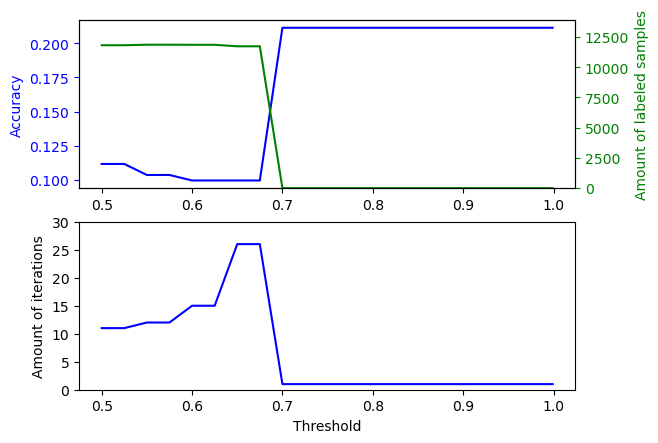

In [49]:
# KNN

self_KNN2_accs = []
self_KNN2_f1s = []
self_KNN2_labelled = []
self_KNN2_rounds = []

start = time.time()

for threshold in thresholds:
    self_KNN2 = SelfTrainingClassifier(KNN, threshold=threshold, max_iter=30)
    
    self_KNN2.fit(emb_train_data, y_train_2000)
    
    Y_valid_emb_pred = self_KNN2.predict(X_valid_emb)
    
    self_KNN2_accs.append(accuracy_score(y_valid, Y_valid_emb_pred))
    self_KNN2_f1s.append(f1_score(y_valid, Y_valid_emb_pred, average='macro')) 
    labelled_or_not = self_KNN2.labeled_iter_
    self_KNN2_labelled.append(labelled_or_not[np.where(labelled_or_not > 0)].shape[0])
    self_KNN2_rounds.append(self_KNN2.n_iter_)

end = time.time()

print("THRESHOLDS -- KNN -- LIMITED TO 2000 LABELLED INPUTS")
print("Total instances:\t", emb_train_data.shape[0])
for i in range(thresholds.size):
    print("Threshold: ", thresholds[i].round(2), "\t", end='')
    print("Accuracy: ", self_KNN2_accs[i].round(4), "\t", end='')
    print("F1: ", self_KNN2_f1s[i].round(4), "\t", end='')
    print("Num. Labelled: ", self_KNN2_labelled[i], "\t", end='')
    print("Iterations: ", self_KNN2_rounds[i])
    
print("Time:\t", end-start)

plotAccByThreshold(thresholds, self_KNN2_accs, self_KNN2_labelled, 13902, self_KNN2_rounds)

THRESHOLDS -- MNB -- LIMITED TO 2000 LABELLED INPUTS
Total instances:	 13902
Threshold:  0.5 	Accuracy:  0.1606 	F1:  0.056 	Num. Labelled:  11588 	Iterations:  19
Threshold:  0.52 	Accuracy:  0.1606 	F1:  0.056 	Num. Labelled:  11371 	Iterations:  17
Threshold:  0.55 	Accuracy:  0.1612 	F1:  0.0562 	Num. Labelled:  11130 	Iterations:  20
Threshold:  0.58 	Accuracy:  0.1612 	F1:  0.0562 	Num. Labelled:  10863 	Iterations:  20
Threshold:  0.6 	Accuracy:  0.1618 	F1:  0.0563 	Num. Labelled:  10601 	Iterations:  20
Threshold:  0.63 	Accuracy:  0.1629 	F1:  0.0568 	Num. Labelled:  10352 	Iterations:  24
Threshold:  0.65 	Accuracy:  0.1635 	F1:  0.0568 	Num. Labelled:  9996 	Iterations:  28
Threshold:  0.68 	Accuracy:  0.1618 	F1:  0.0556 	Num. Labelled:  9313 	Iterations:  30
Threshold:  0.7 	Accuracy:  0.2199 	F1:  0.1887 	Num. Labelled:  40 	Iterations:  6
Threshold:  0.73 	Accuracy:  0.2199 	F1:  0.1922 	Num. Labelled:  0 	Iterations:  1
Threshold:  0.75 	Accuracy:  0.2199 	F1:  0.1922 

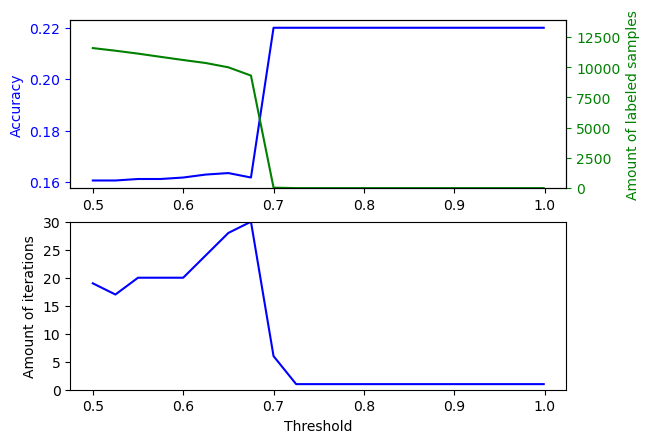

In [50]:
# MNB

self_MNB2_accs = []
self_MNB2_f1s = []
self_MNB2_labelled = []
self_MNB2_rounds = []

start = time.time()

for threshold in thresholds:
    self_MNB2 = SelfTrainingClassifier(MNB, threshold=threshold, max_iter=30)
    
    self_MNB2.fit(tfidf_train_data, y_train_2000)
    
    Y_valid_tfidf_pred = self_MNB2.predict(X_valid_tfidf)
    
    self_MNB2_accs.append(accuracy_score(y_valid, Y_valid_tfidf_pred))
    self_MNB2_f1s.append(f1_score(y_valid, Y_valid_tfidf_pred, average='macro')) 
    labelled_or_not = self_MNB2.labeled_iter_
    self_MNB2_labelled.append(labelled_or_not[np.where(labelled_or_not > 0)].shape[0])
    self_MNB2_rounds.append(self_MNB2.n_iter_)

end = time.time()

print("THRESHOLDS -- MNB -- LIMITED TO 2000 LABELLED INPUTS")
print("Total instances:\t", tfidf_train_data.shape[0])
for i in range(thresholds.size):
    print("Threshold: ", thresholds[i].round(2), "\t", end='')
    print("Accuracy: ", self_MNB2_accs[i].round(4), "\t", end='')
    print("F1: ", self_MNB2_f1s[i].round(4), "\t", end='')
    print("Num. Labelled: ", self_MNB2_labelled[i], "\t", end='')
    print("Iterations: ", self_MNB2_rounds[i])
    
print("Time:\t", end-start)

plotAccByThreshold(thresholds, self_MNB2_accs, self_MNB2_labelled, 13902, self_MNB2_rounds)

In [71]:
# Agglomerative Clustering

AGG = AgglomerativeClustering(n_clusters=10)

AGG_train_predicts = AGG.fit_predict(X_train_lab_emb)
AGG_valid_predicts = AGG.fit_predict(X_valid_emb)


TRAINING DATA
Rand 0.8122369046130766
Adjusted Rand 0.02309087179255103
NMI 0.04918427352857114
AMI 0.047042922999741985
VALIDATION DATA
Rand:  0.8100066590790308
Adjusted Rand 0.029487277196672726
NMI 0.06296642534442931
AMI 0.05293201372010649


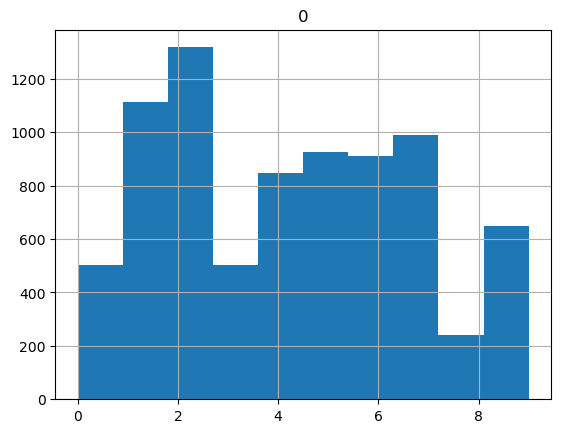

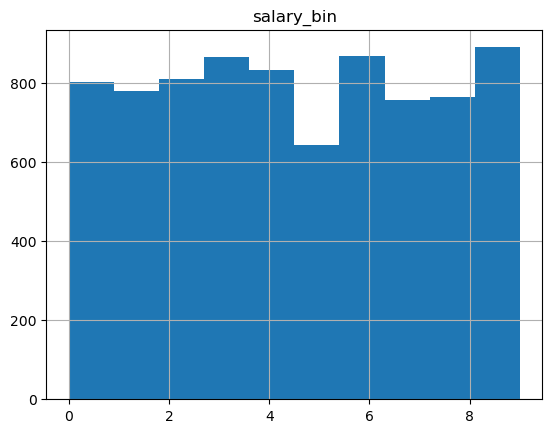

In [89]:
# pd.DataFrame(AGG_train_predicts).hist()
# pd.DataFrame(y_train_lab).hist()


print("TRAINING DATA")
print("Rand", rand_score(AGG_train_predicts, y_train_lab))
print("Adjusted Rand", adjusted_rand_score(AGG_train_predicts, y_train_lab))
print("NMI", normalized_mutual_info_score(AGG_train_predicts, y_train_lab))
print("AMI", adjusted_mutual_info_score(AGG_train_predicts, y_train_lab))

print("VALIDATION DATA")
print("Rand: ", rand_score(AGG_valid_predicts, y_valid))
print("Adjusted Rand", adjusted_rand_score(AGG_valid_predicts, y_valid))
print("NMI", normalized_mutual_info_score(AGG_valid_predicts, y_valid))
print("AMI", adjusted_mutual_info_score(AGG_valid_predicts, y_valid))

In [91]:
# KMEANS CLUSTERING
KMEANS = KMeans(n_clusters=10)

KMEANS_train_predicts = KMEANS.fit_predict(X_train_lab_emb)
KMEANS_valid_predicts = KMEANS.fit_predict(X_valid_emb)

TRAINING DATA
Rand 0.8180199087385923
Adjusted Rand 0.03242001284008163
NMI 0.05980466748756616
AMI 0.05770151245683566
HCVM (0.060440365856994534, 0.05918220220451992, 0.059804667487566174)
VALIDATION DATA
Rand:  0.8132718628707263
Adjusted Rand 0.028865784805681673
NMI 0.06500555677989694
AMI 0.05510221809108865
HCVM (0.06613776941506852, 0.06391145640259055, 0.06500555677989696)


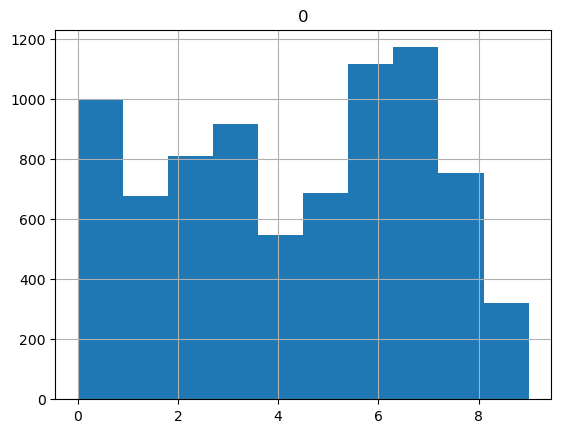

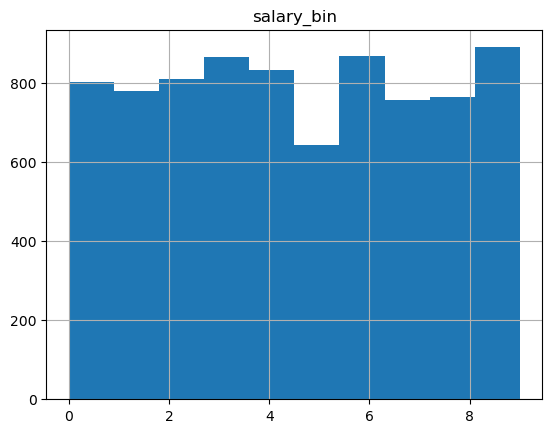

In [95]:
pd.DataFrame(KMEANS_train_predicts).hist()
pd.DataFrame(y_train_lab).hist()


print("TRAINING DATA")
print("Rand", rand_score(KMEANS_train_predicts, y_train_lab))
print("Adjusted Rand", adjusted_rand_score(KMEANS_train_predicts, y_train_lab))
print("NMI", normalized_mutual_info_score(KMEANS_train_predicts, y_train_lab))
print("AMI", adjusted_mutual_info_score(KMEANS_train_predicts, y_train_lab))
print("HCVM", homogeneity_completeness_v_measure(KMEANS_train_predicts, y_train_lab))

print("VALIDATION DATA")
print("Rand: ", rand_score(KMEANS_valid_predicts, y_valid))
print("Adjusted Rand", adjusted_rand_score(KMEANS_valid_predicts, y_valid))
print("NMI", normalized_mutual_info_score(KMEANS_valid_predicts, y_valid))
print("AMI", adjusted_mutual_info_score(KMEANS_valid_predicts, y_valid))
print("HCVM", homogeneity_completeness_v_measure(KMEANS_valid_predicts, y_valid))

array([[<AxesSubplot:title={'center':'salary_bin'}>]], dtype=object)

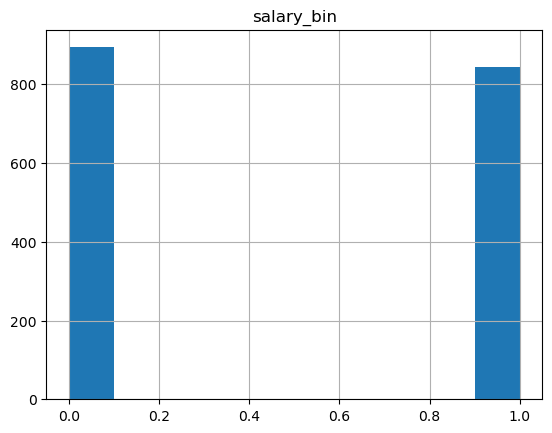

In [122]:
# What if this was a binary classification problem, rather than 10 labels?
y_2bin_train_all = y_train_all.copy()
y_2bin_train_all[(y_2bin_train_all < 5) & (y_2bin_train_all != -1)] = 0
y_2bin_train_all[y_2bin_train_all > 4] = 1

y_2bin_valid = y_valid.copy()
y_2bin_valid[y_2bin_valid < 5] = 0
y_2bin_valid[y_2bin_valid > 4] = 1


In [123]:
# LOGISTIC REGRESSION ON BINARY CLASSES
LR_bin = LogisticRegression(max_iter=250)

LR_bin.fit(X_train_lab_emb, y_2bin_train_all[:8000])
print("LR:\t", LR_bin.score(X_valid_emb, y_2bin_valid).round(4))
# pd.DataFrame()

LR:	 0.715


THRESHOLDS -- LOGISTIC REGRESSION -- BINARY CLASSES
Total instances:	 13902
Threshold:  0.6 	Accuracy:  0.7179 	F1:  0.7179 	Num. Labelled:  5160 	Iterations:  6
Threshold:  0.65 	Accuracy:  0.715 	F1:  0.715 	Num. Labelled:  4733 	Iterations:  7
Threshold:  0.7 	Accuracy:  0.7191 	F1:  0.7191 	Num. Labelled:  4185 	Iterations:  8
Threshold:  0.75 	Accuracy:  0.7191 	F1:  0.7191 	Num. Labelled:  3564 	Iterations:  7
Threshold:  0.8 	Accuracy:  0.7145 	F1:  0.7144 	Num. Labelled:  2773 	Iterations:  9
Threshold:  0.85 	Accuracy:  0.7185 	F1:  0.7185 	Num. Labelled:  1701 	Iterations:  7
Threshold:  0.9 	Accuracy:  0.7168 	F1:  0.7167 	Num. Labelled:  633 	Iterations:  6
Threshold:  0.95 	Accuracy:  0.7145 	F1:  0.7144 	Num. Labelled:  57 	Iterations:  3
Threshold:  1.0 	Accuracy:  0.715 	F1:  0.715 	Num. Labelled:  0 	Iterations:  1
Time:	 13.090823650360107


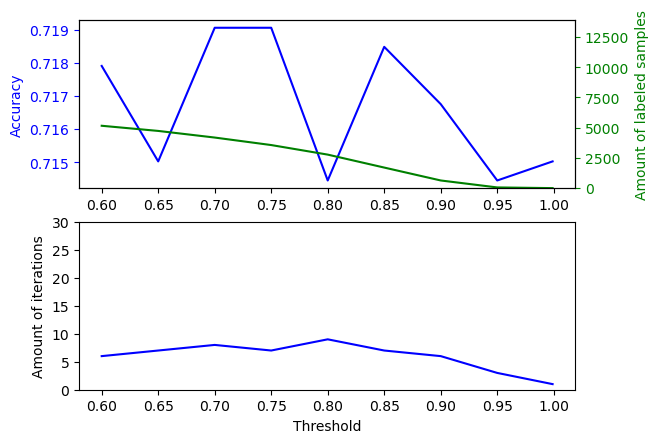

In [160]:
# SELF LEARNING LR ON BINARY CLASSES
thresholds = np.arange(0.6, 1.0, 0.05)
thresholds = np.append(thresholds, 0.999)
# print(thresholds)

# LOGISTIC REGRESSION

self_LR_bin_accs = []
self_LR_bin_f1s = []
self_LR_bin_labelled = []
self_LR_bin_rounds = []

start = time.time()

for threshold in thresholds:
    self_LR_bin = SelfTrainingClassifier(LR_bin, threshold=threshold, max_iter=30)
    
    self_LR_bin.fit(emb_train_data, y_2bin_train_all)
    
    Y_valid_emb_bin_pred = self_LR_bin.predict(X_valid_emb)
    
    self_LR_bin_accs.append(accuracy_score(y_2bin_valid, Y_valid_emb_bin_pred))
    self_LR_bin_f1s.append(f1_score(y_2bin_valid, Y_valid_emb_bin_pred, average='macro')) 
    labelled_or_not = self_LR_bin.labeled_iter_
    self_LR_bin_labelled.append(labelled_or_not[np.where(labelled_or_not > 0)].shape[0])
    self_LR_bin_rounds.append(self_LR_bin.n_iter_)

end = time.time()

print("THRESHOLDS -- LOGISTIC REGRESSION -- BINARY CLASSES")
print("Total instances:\t", emb_train_data.shape[0])
for i in range(thresholds.size):
    print("Threshold: ", thresholds[i].round(2), "\t", end='')
    print("Accuracy: ", self_LR_bin_accs[i].round(4), "\t", end='')
    print("F1: ", self_LR_bin_f1s[i].round(4), "\t", end='')
    print("Num. Labelled: ", self_LR_bin_labelled[i], "\t", end='')
    print("Iterations: ", self_LR_bin_rounds[i])
    
print("Time:\t", end-start)

plotAccByThreshold(thresholds, self_LR_bin_accs, self_LR_bin_labelled, 13902, self_LR_bin_rounds)

In [126]:
# What if this was a five classification problem, rather than 10 labels?
y_4bin_train_all = y_train_all.copy()
y_4bin_train_all[(y_4bin_train_all < 2) & (y_4bin_train_all != -1)] = 0
y_4bin_train_all[(y_4bin_train_all < 4) & (y_4bin_train_all > 1)] = 1
y_4bin_train_all[(y_4bin_train_all < 6) & (y_4bin_train_all > 3)] = 2
y_4bin_train_all[(y_4bin_train_all < 8) & (y_4bin_train_all > 5)] = 3
y_4bin_train_all[y_4bin_train_all > 7] = 4

y_4bin_valid = y_valid.copy()
y_4bin_valid[(y_4bin_valid < 2)]
y_4bin_valid[(y_4bin_valid < 4) & (y_4bin_valid > 1)] = 1
y_4bin_valid[(y_4bin_valid < 6) & (y_4bin_valid > 3)] = 2
y_4bin_valid[(y_4bin_valid < 8) & (y_4bin_valid > 5)] = 3
y_4bin_valid[y_4bin_valid > 7] = 4


In [127]:
# LOGISTIC REGRESSION ON five CLASSES
LR_bin = LogisticRegression(max_iter=250)

LR_bin.fit(X_train_lab_emb, y_4bin_train_all[:8000])
print("LR:\t", LR_bin.score(X_valid_emb, y_4bin_valid).round(4))
# pd.DataFrame()

LR:	 0.3794


In [229]:
# Calibration of self-learning LR (also need to calibrate non self-learning one for comparison)
LR = LogisticRegression(max_iter=250)
LR.fit(X_train_lab_emb, y_train_lab)

cal_LR = CalibratedClassifierCV(LR, method="isotonic", cv="prefit")
cal_LR.fit(X_valid_emb, y_valid)

self_LR = SelfTrainingClassifier(LR, threshold=0.75, max_iter=30)    
self_LR.fit(emb_train_data, y_train_all)

cal_self_LR = CalibratedClassifierCV(self_LR, method="isotonic", cv="prefit")
cal_self_LR.fit(X_valid_emb, y_valid)




print("VALID LR:", LR.score(X_valid_emb, y_valid))
print("VALID cal_LR:", cal_LR.score(X_valid_emb, y_valid))
# print("TEST LR:", LR.score(X_test_emb, y_test))
print("VALID self_LR:", self_LR.score(X_valid_emb, y_valid))
print("VALID cal_self_LR:", cal_self_LR.score(X_valid_emb, y_valid))

# print("VALID cal_2_self_LR:", cal_2_self_LR.score(X_valid_emb, y_valid))

# print("TEST self_LR:", self_LR.score(X_test_emb, y_test))
# print("TEST cal_self_LR:", cal_self_LR.score(X_test_emb, y_test))



VALID LR: 0.24352331606217617
VALID cal_LR: 0.26424870466321243
VALID self_LR: 0.24467472654001152
VALID cal_self_LR: 0.26424870466321243


In [180]:
LR_pred = LR.predict(X_test_emb)
cal_LR_pred = cal_LR.predict(X_test_emb)
self_LR_pred = self_LR.predict(X_test_emb)
cal_self_LR_pred = cal_self_LR.predict(X_test_emb)

pred2submission(LR_pred).to_csv("results/calibration/LR.csv", index=False)
pred2submission(cal_LR_pred).to_csv("results/calibration/cal_LR.csv", index=False)
pred2submission(self_LR_pred).to_csv("results/calibration/self_LR_75.csv", index=False)
pred2submission(cal_self_LR_pred).to_csv("results/calibration/cal_self_LR_75.csv", index=False)

In [219]:
X_valid_emb_extra = pd.concat([X_valid_emb, emb_train_data[11902:]])
y_valid_extra = pd.concat([y_valid, pd.Series(y_train_all[11902:])])
emb_train_data_reduced = emb_train_data[:11902]
y_train_all_reduced = y_train_all[:11902]

#doing the same as above but with 2000 unlabeled instances moved into validation
# seeing if this fixes the two above calibrated classifiers performing exactly the same

self_LR_alt = SelfTrainingClassifier(LR, threshold=0.75, max_iter=30)
self_LR_alt.fit(emb_train_data_reduced, y_train_all_reduced)

cal_self_LR_alt = CalibratedClassifierCV(self_LR_alt, method="isotonic", cv="prefit")
cal_self_LR_alt.fit(X_valid_emb_extra, y_valid_extra)

print("ALT VALID self_LR:", self_LR_alt.score(X_valid_emb, y_valid))
print("ALT VALID cal_self_LR:", cal_self_LR_alt.score(X_valid_emb, y_valid))

ALT VALID self_LR: 0.24409902130109384
ALT VALID cal_self_LR: 0.26482440990213013


In [220]:
cal_self_LR_alt_pred = cal_self_LR_alt.predict(X_test_emb)
pred2submission(cal_self_LR_alt_pred).to_csv("results/calibration/cal_self_LR_alt_75.csv", index=False)

In [48]:
# ISO CALIBRATED LOGISITIC REGRESSION

LR = LogisticRegression(max_iter=250)
cal_LR = CalibratedClassifierCV(LR, method="isotonic")
cal_LR.fit(X_train_lab_emb, y_train_lab)
print("cal_LR", cal_LR.score(X_valid_emb, y_valid))

cal_LR 0.25215889464594127


 -- LOGISTIC REGRESSION -- ISOTONIC -- SELF-TRAINING -- 
Total instances:	 13902
Threshold: 0.30 | Acc: 0.2320 	Labelled: 4014 	Iterations: 30 	F1: 0.1762 	Prec: 0.2009 	Rec:0.2267
Threshold: 0.35 | Acc: 0.2470 	Labelled: 1661 	Iterations: 30 	F1: 0.2108 	Prec: 0.2229 	Rec:0.2457
Threshold: 0.40 | Acc: 0.2499 	Labelled: 933 	Iterations: 27 	F1: 0.2177 	Prec: 0.2292 	Rec:0.2498
Threshold: 0.45 | Acc: 0.2464 	Labelled: 433 	Iterations: 20 	F1: 0.2149 	Prec: 0.2277 	Rec:0.2461
Threshold: 0.50 | Acc: 0.2470 	Labelled: 153 	Iterations: 19 	F1: 0.2127 	Prec: 0.2205 	Rec:0.2454
Threshold: 0.55 | Acc: 0.2527 	Labelled: 23 	Iterations: 5 	F1: 0.2176 	Prec: 0.2287 	Rec:0.2518
Threshold: 0.60 | Acc: 0.2487 	Labelled: 2 	Iterations: 2 	F1: 0.2143 	Prec: 0.2221 	Rec:0.2476
Threshold: 0.65 | Acc: 0.2522 	Labelled: 0 	Iterations: 1 	F1: 0.2174 	Prec: 0.2270 	Rec:0.2509
Threshold: 0.70 | Acc: 0.2522 	Labelled: 0 	Iterations: 1 	F1: 0.2174 	Prec: 0.2270 	Rec:0.2509
Threshold: 0.75 | Acc: 0.2522 	Labell

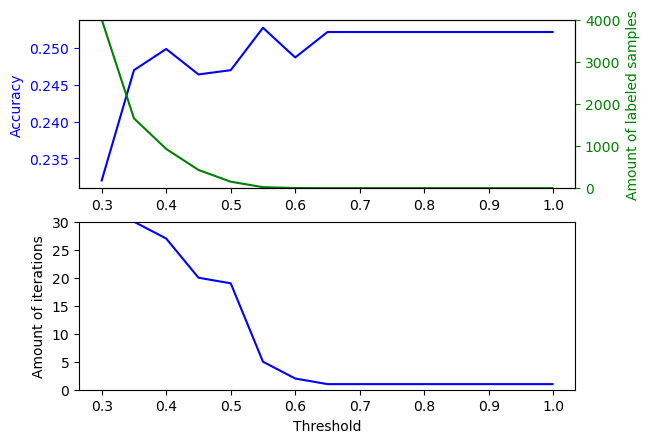

In [243]:
# ISO CALIBRATED SELF-TRAINING LOGISITIC REGRESSION
thresholds = np.arange(0.3, 1.0, 0.05)
thresholds = np.append(thresholds, 0.999)

LR = LogisticRegression(max_iter=250)
cal_LR = CalibratedClassifierCV(LR, method="isotonic")

cal_2_self_LR_accs = []
cal_2_self_LR_f1s = []
cal_2_self_LR_precs = []
cal_2_self_LR_recs = []
cal_2_self_LR_labelled = []
cal_2_self_LR_rounds = []

start = time.time()

for threshold in thresholds:
    cal_2_self_LR = SelfTrainingClassifier(cal_LR, threshold=threshold, max_iter=30)
    
    cal_2_self_LR.fit(emb_train_data, y_train_all)
    
    Y_valid_emb_pred = cal_2_self_LR.predict(X_valid_emb)
    
    cal_2_self_LR_accs.append(accuracy_score(y_valid, Y_valid_emb_pred))
    cal_2_self_LR_f1s.append(f1_score(y_valid, Y_valid_emb_pred, average='macro')) 
    cal_2_self_LR_precs.append(precision_score(y_valid, Y_valid_emb_pred, average='macro')) 
    cal_2_self_LR_recs.append(recall_score(y_valid, Y_valid_emb_pred, average='macro')) 
    labelled_or_not = cal_2_self_LR.labeled_iter_
    cal_2_self_LR_labelled.append(labelled_or_not[np.where(labelled_or_not > 0)].shape[0])
    cal_2_self_LR_rounds.append(cal_2_self_LR.n_iter_)
    
end = time.time()

print(" -- LOGISTIC REGRESSION -- ISOTONIC -- SELF-TRAINING -- ")
print("Total instances:\t", emb_train_data.shape[0])
for i in range(thresholds.size):
    print("Threshold: %.2f" % thresholds[i].round(2), "| ", end='')
    print("Acc: %.4f" % cal_2_self_LR_accs[i].round(4), "\t", end='')
    print("Labelled:", cal_2_self_LR_labelled[i], "\t", end='')
    print("Iterations:", cal_2_self_LR_rounds[i], "\t", end='')
    print("F1: %.4f" % cal_2_self_LR_f1s[i].round(4), "\t", end='')
    print("Prec: %.4f" % cal_2_self_LR_precs[i].round(4), "\t", end='')
    print("Rec:%.4f" % cal_2_self_LR_recs[i].round(4))
    
print("Time:\t", end-start)

plotAccByThreshold(thresholds, cal_2_self_LR_accs, cal_2_self_LR_labelled, 4000, cal_2_self_LR_rounds)



In [234]:
# cal_2_self_LR_pred = cal_2_self_LR.predict(X_test_emb)
# pred2submission(cal_2_self_LR_pred).to_csv("results/calibration/cal_2_self_LR_75.csv", index=False)
# cal_LR_pred = cal_LR.predict(X_test_emb)
# pred2submission(cal_LR_pred).to_csv("results/calibration/cal_2_LR.csv", index=False)

In [258]:
# ISO CALIBRATED LOGISITIC REGRESSION

KNN = KNeighborsClassifier(n_neighbors=20)
cal_KNN = CalibratedClassifierCV(KNN, method="isotonic")
cal_KNN.fit(X_train_lab_emb, y_train_lab)
print("cal_KNN_20:", cal_KNN.score(X_valid_emb, y_valid))

KNN = KNeighborsClassifier(n_neighbors=35)
cal_KNN = CalibratedClassifierCV(KNN, method="isotonic")
cal_KNN.fit(X_train_lab_emb, y_train_lab)
print("cal_KNN_35:", cal_KNN.score(X_valid_emb, y_valid))

# best param for cal_KNN
# cal_KNN.get_params().keys()
# param_grid = {'base_estimator__n_neighbors':[5,10,15,20,25,30,35,40]}
# grid_search = GridSearchCV(cal_KNN, param_grid, cv=5)
# grid_search.fit(X_train_lab_emb, y_train_lab)

# print("Best alpha value:", grid_search.best_params_['base_estimator__n_neighbors'])
# print("Accuracy:", grid_search.score(X_valid_emb, y_valid))

cal_KNN_20: 0.24640184225676454
cal_KNN_35: 0.24409902130109384


 -- KNN -- ISOTONIC -- SELF-TRAINING -- 
Total instances:	 13902
Threshold: 0.30 | Acc: 0.2205 	Labelled: 5428 	Iterations: 22 	F1: 0.1612 	Prec: 0.2091 	Rec:0.2163
Threshold: 0.35 | Acc: 0.2234 	Labelled: 3605 	Iterations: 30 	F1: 0.1692 	Prec: 0.2056 	Rec:0.2196
Threshold: 0.40 | Acc: 0.2366 	Labelled: 1002 	Iterations: 30 	F1: 0.2139 	Prec: 0.2236 	Rec:0.2365
Threshold: 0.45 | Acc: 0.2464 	Labelled: 281 	Iterations: 10 	F1: 0.2204 	Prec: 0.2314 	Rec:0.2468
Threshold: 0.50 | Acc: 0.2424 	Labelled: 183 	Iterations: 12 	F1: 0.2176 	Prec: 0.2268 	Rec:0.2424
Threshold: 0.55 | Acc: 0.2447 	Labelled: 68 	Iterations: 4 	F1: 0.2179 	Prec: 0.2273 	Rec:0.2448
Threshold: 0.60 | Acc: 0.2458 	Labelled: 47 	Iterations: 6 	F1: 0.2184 	Prec: 0.2240 	Rec:0.2460
Threshold: 0.65 | Acc: 0.2464 	Labelled: 9 	Iterations: 2 	F1: 0.2199 	Prec: 0.2271 	Rec:0.2469
Threshold: 0.70 | Acc: 0.2464 	Labelled: 0 	Iterations: 1 	F1: 0.2199 	Prec: 0.2257 	Rec:0.2470
Threshold: 0.75 | Acc: 0.2464 	Labelled: 0 	Iterati

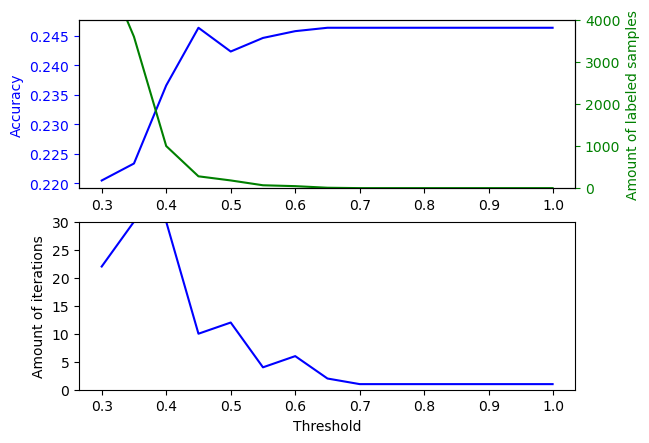

In [19]:
# ISO CALIBRATED SELF-TRAINING KNN
thresholds = np.arange(0.3, 1.0, 0.05)
thresholds = np.append(thresholds, 0.999)

KNN = KNeighborsClassifier(n_neighbors=20, metric="cosine")
cal_KNN = CalibratedClassifierCV(KNN, method="isotonic")

cal_2_self_KNN_accs = []
cal_2_self_KNN_f1s = []
cal_2_self_KNN_precs = []
cal_2_self_KNN_recs = []
cal_2_self_KNN_labelled = []
cal_2_self_KNN_rounds = []

start = time.time()

for threshold in thresholds:
    cal_2_self_KNN = SelfTrainingClassifier(cal_KNN, threshold=threshold, max_iter=30)
    
    cal_2_self_KNN.fit(emb_train_data, y_train_all)
    
    Y_valid_emb_pred = cal_2_self_KNN.predict(X_valid_emb)
    
    cal_2_self_KNN_accs.append(accuracy_score(y_valid, Y_valid_emb_pred))
    cal_2_self_KNN_f1s.append(f1_score(y_valid, Y_valid_emb_pred, average='macro')) 
    cal_2_self_KNN_precs.append(precision_score(y_valid, Y_valid_emb_pred, average='macro')) 
    cal_2_self_KNN_recs.append(recall_score(y_valid, Y_valid_emb_pred, average='macro')) 
    labelled_or_not = cal_2_self_KNN.labeled_iter_
    cal_2_self_KNN_labelled.append(labelled_or_not[np.where(labelled_or_not > 0)].shape[0])
    cal_2_self_KNN_rounds.append(cal_2_self_KNN.n_iter_)
    
end = time.time()

print(" -- KNN -- ISOTONIC -- SELF-TRAINING -- ")
print("Total instances:\t", emb_train_data.shape[0])
for i in range(thresholds.size):
    print("Threshold: %.2f" % thresholds[i].round(2), "| ", end='')
    print("Acc: %.4f" % cal_2_self_KNN_accs[i].round(4), "\t", end='')
    print("Labelled:", cal_2_self_KNN_labelled[i], "\t", end='')
    print("Iterations:", cal_2_self_KNN_rounds[i], "\t", end='')
    print("F1: %.4f" % cal_2_self_KNN_f1s[i].round(4), "\t", end='')
    print("Prec: %.4f" % cal_2_self_KNN_precs[i].round(4), "\t", end='')
    print("Rec:%.4f" % cal_2_self_KNN_recs[i].round(4))
    
print("Time:\t", end-start)

plotAccByThreshold(thresholds, cal_2_self_KNN_accs, cal_2_self_KNN_labelled, 4000, cal_2_self_KNN_rounds)

In [36]:
# ISO CALIBRATED MNB

MNB = MultinomialNB(alpha=0.7)
cal_MNB = CalibratedClassifierCV(MNB, method="isotonic")
cal_MNB.fit(X_train_lab_tfidf, y_train_lab)
print("cal_MNB:", cal_MNB.score(X_valid_tfidf, y_valid))
# cal_MNB.get_params().keys()
# best faram for cal_MNB
# param_grid = {'base_estimator__alpha':[0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2,3]}
# grid_search = GridSearchCV(cal_MNB, param_grid, cv=5)
# grid_search.fit(X_train_lab_tfidf, y_train_lab)

# print("Best alpha value:", grid_search.best_params_['base_estimator__alpha'])
# print("Accuracy:", grid_search.score(X_valid_tfidf, y_valid))

cal_MNB: 0.229706390328152


 -- MNB -- ISOTONIC -- SELF-TRAINING -- 
Total instances:	 13902
Threshold: 0.30 | Acc: 0.2055 	Labelled: 3929 	Iterations: 30 	F1: 0.1608 	Prec: 0.1656 	Rec:0.2014
Threshold: 0.35 | Acc: 0.2280 	Labelled: 1896 	Iterations: 27 	F1: 0.2093 	Prec: 0.2148 	Rec:0.2249
Threshold: 0.40 | Acc: 0.2199 	Labelled: 1233 	Iterations: 26 	F1: 0.2046 	Prec: 0.2118 	Rec:0.2170
Threshold: 0.45 | Acc: 0.2188 	Labelled: 821 	Iterations: 15 	F1: 0.1943 	Prec: 0.1972 	Rec:0.2155
Threshold: 0.50 | Acc: 0.2234 	Labelled: 531 	Iterations: 13 	F1: 0.1965 	Prec: 0.1955 	Rec:0.2198
Threshold: 0.55 | Acc: 0.2274 	Labelled: 318 	Iterations: 19 	F1: 0.1989 	Prec: 0.1977 	Rec:0.2243
Threshold: 0.60 | Acc: 0.2314 	Labelled: 126 	Iterations: 8 	F1: 0.2012 	Prec: 0.2062 	Rec:0.2272
Threshold: 0.65 | Acc: 0.2274 	Labelled: 66 	Iterations: 5 	F1: 0.1944 	Prec: 0.1981 	Rec:0.2234
Threshold: 0.70 | Acc: 0.2297 	Labelled: 23 	Iterations: 10 	F1: 0.1958 	Prec: 0.2013 	Rec:0.2258
Threshold: 0.75 | Acc: 0.2286 	Labelled: 5 	I

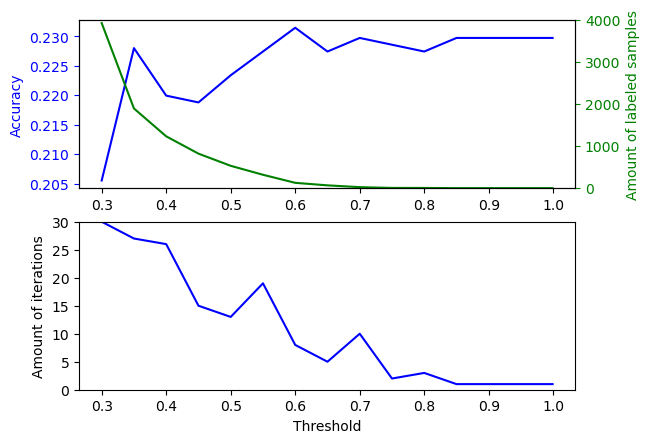

In [37]:
# ISO CALIBRATED SELF-TRAINING MNB
thresholds = np.arange(0.3, 1.0, 0.05)
thresholds = np.append(thresholds, 0.999)

MNB = MultinomialNB(alpha=0.7)
cal_MNB = CalibratedClassifierCV(MNB, method="isotonic")

cal_2_self_MNB_accs = []
cal_2_self_MNB_f1s = []
cal_2_self_MNB_precs = []
cal_2_self_MNB_recs = []
cal_2_self_MNB_labelled = []
cal_2_self_MNB_rounds = []

start = time.time()

for threshold in thresholds:
    cal_2_self_MNB = SelfTrainingClassifier(cal_MNB, threshold=threshold, max_iter=30)
    cal_2_self_MNB.fit(tfidf_train_data, y_train_all)
    
    Y_valid_tfidf_pred = cal_2_self_MNB.predict(X_valid_tfidf)
    
    cal_2_self_MNB_accs.append(accuracy_score(y_valid, Y_valid_tfidf_pred))
    cal_2_self_MNB_f1s.append(f1_score(y_valid, Y_valid_tfidf_pred, average='macro')) 
    cal_2_self_MNB_precs.append(precision_score(y_valid, Y_valid_tfidf_pred, average='macro')) 
    cal_2_self_MNB_recs.append(recall_score(y_valid, Y_valid_tfidf_pred, average='macro')) 
    labelled_or_not = cal_2_self_MNB.labeled_iter_
    cal_2_self_MNB_labelled.append(labelled_or_not[np.where(labelled_or_not > 0)].shape[0])
    cal_2_self_MNB_rounds.append(cal_2_self_MNB.n_iter_)
    
end = time.time()

print(" -- MNB -- ISOTONIC -- SELF-TRAINING -- ")
print("Total instances:\t", tfidf_train_data.shape[0])
for i in range(thresholds.size):
    print("Threshold: %.2f" % thresholds[i].round(2), "| ", end='')
    print("Acc: %.4f" % cal_2_self_MNB_accs[i].round(4), "\t", end='')
    print("Labelled:", cal_2_self_MNB_labelled[i], "\t", end='')
    print("Iterations:", cal_2_self_MNB_rounds[i], "\t", end='')
    print("F1: %.4f" % cal_2_self_MNB_f1s[i].round(4), "\t", end='')
    print("Prec: %.4f" % cal_2_self_MNB_precs[i].round(4), "\t", end='')
    print("Rec:%.4f" % cal_2_self_MNB_recs[i].round(4))
    
print("Time:\t", end-start)


plotAccByThreshold(thresholds, cal_2_self_MNB_accs, cal_2_self_MNB_labelled, 4000, cal_2_self_MNB_rounds)

In [42]:
# train models
LR = LogisticRegression(max_iter=250)
cal_LR = CalibratedClassifierCV(LR, method="isotonic")
cal_self_LR = SelfTrainingClassifier(cal_LR, threshold=0.55, max_iter=30)
cal_self_LR.fit(emb_train_data, y_train_all)

KNN = KNeighborsClassifier(n_neighbors=20, metric="cosine")
cal_KNN = CalibratedClassifierCV(KNN, method="isotonic")
cal_self_KNN = SelfTrainingClassifier(cal_KNN, threshold=0.60, max_iter=30)
cal_self_KNN.fit(emb_train_data, y_train_all)

MNB = MultinomialNB(alpha=0.7)
cal_MNB = CalibratedClassifierCV(MNB, method="isotonic")
cal_self_MNB = SelfTrainingClassifier(cal_MNB, threshold=0.60, max_iter=30)
cal_self_MNB.fit(tfidf_train_data, y_train_all)

# predict
cal_self_LR_pred = cal_self_LR.predict(X_test_emb)
cal_self_KNN_pred = cal_self_KNN.predict(X_test_emb)
cal_self_MNB_pred = cal_self_MNB.predict(X_test_tfidf)

# save to disk
pred2submission(cal_self_LR_pred).to_csv("report_results/iso_self_training/cal_self_LR_pred.csv", index=False)
pred2submission(cal_self_KNN_pred).to_csv("report_results/iso_self_training/cal_self_KNN_pred.csv", index=False)
pred2submission(cal_self_MNB_pred).to_csv("report_results/iso_self_training/cal_self_MNB_pred.csv", index=False)

 -- KNN -- ISOTONIC -- SELF-TRAINING -- 
Total instances:	 13902
Threshold: 0.30 | Acc: 0.2205 	Labelled: 5428 	Iterations: 22 	F1: 0.1612 	Prec: 0.2091 	Rec:0.2163
Threshold: 0.35 | Acc: 0.2234 	Labelled: 3605 	Iterations: 30 	F1: 0.1692 	Prec: 0.2056 	Rec:0.2196
Threshold: 0.40 | Acc: 0.2366 	Labelled: 1002 	Iterations: 30 	F1: 0.2139 	Prec: 0.2236 	Rec:0.2365
Threshold: 0.45 | Acc: 0.2464 	Labelled: 281 	Iterations: 10 	F1: 0.2204 	Prec: 0.2314 	Rec:0.2468
Threshold: 0.50 | Acc: 0.2424 	Labelled: 183 	Iterations: 12 	F1: 0.2176 	Prec: 0.2268 	Rec:0.2424
Threshold: 0.55 | Acc: 0.2447 	Labelled: 68 	Iterations: 4 	F1: 0.2179 	Prec: 0.2273 	Rec:0.2448
Threshold: 0.60 | Acc: 0.2458 	Labelled: 47 	Iterations: 6 	F1: 0.2184 	Prec: 0.2240 	Rec:0.2460
Threshold: 0.65 | Acc: 0.2464 	Labelled: 9 	Iterations: 2 	F1: 0.2199 	Prec: 0.2271 	Rec:0.2469
Threshold: 0.70 | Acc: 0.2464 	Labelled: 0 	Iterations: 1 	F1: 0.2199 	Prec: 0.2257 	Rec:0.2470
Threshold: 0.75 | Acc: 0.2464 	Labelled: 0 	Iterati

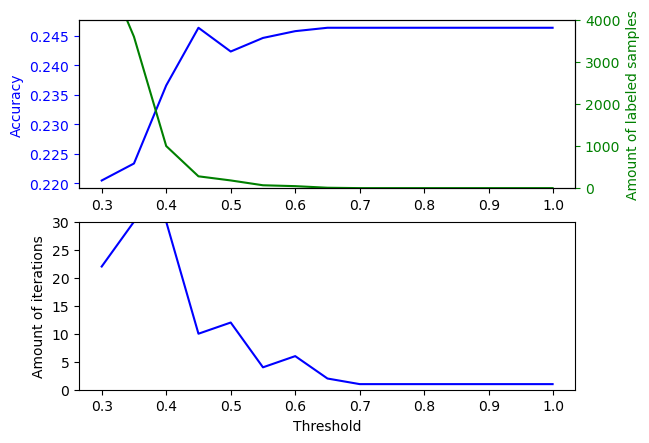